In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Görselleştirme ayarları
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

found_file = False
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if filename.endswith('.csv'):
            file_path = os.path.join(dirname, filename)
            df = pd.read_csv(file_path)
            found_file = True
            print(f"Dosya bulundu: {file_path}")
            break

if not found_file:
    df = pd.read_csv('default_of_credit_card_clients.csv')

df.columns = df.columns.str.lower().str.replace(' ', '_')
df.rename(columns={'default.payment.next.month': 'target', 'default_payment_next_month': 'target'}, inplace=True)

if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)

print("Veri yüklendi ve başlıklar düzeltildi!")
display(df.head())

Dosya bulundu: /kaggle/input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv
Veri yüklendi ve başlıklar düzeltildi!


,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,target
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [2]:
print("--- Veri Seti Bilgileri ---")
df.info()

print("\n--- Eksik Değer Sayısı ---")
print(df.isnull().sum())

print("\n--- İstatistiksel Özet ---")
display(df.describe().T)

--- Veri Seti Bilgileri ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   limit_bal  30000 non-null  float64
 1   sex        30000 non-null  int64  
 2   education  30000 non-null  int64  
 3   marriage   30000 non-null  int64  
 4   age        30000 non-null  int64  
 5   pay_0      30000 non-null  int64  
 6   pay_2      30000 non-null  int64  
 7   pay_3      30000 non-null  int64  
 8   pay_4      30000 non-null  int64  
 9   pay_5      30000 non-null  int64  
 10  pay_6      30000 non-null  int64  
 11  bill_amt1  30000 non-null  float64
 12  bill_amt2  30000 non-null  float64
 13  bill_amt3  30000 non-null  float64
 14  bill_amt4  30000 non-null  float64
 15  bill_amt5  30000 non-null  float64
 16  bill_amt6  30000 non-null  float64
 17  pay_amt1   30000 non-null  float64
 18  pay_amt2   30000 non-null  float64
 19  pay_amt3   30000 n

,count,mean,std,min,25%,50%,75%,max
limit_bal,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
sex,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
education,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
marriage,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
age,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
pay_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
pay_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
pay_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
pay_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
pay_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


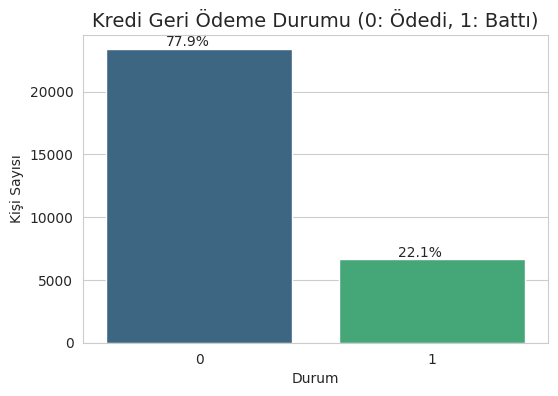

In [3]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='target', data=df, palette='viridis')
plt.title('Kredi Geri Ödeme Durumu (0: Ödedi, 1: Battı)', fontsize=14)
plt.xlabel('Durum')
plt.ylabel('Kişi Sayısı')

total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

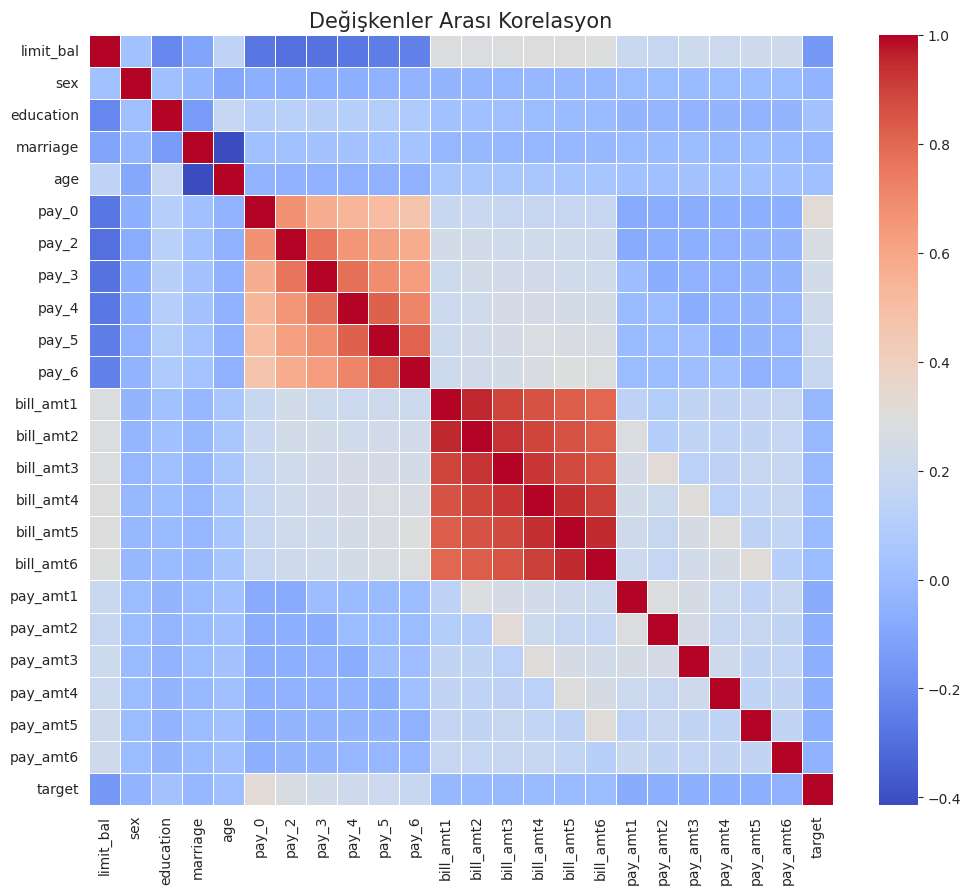

Target ile en yüksek korelasyonlu 10 özellik:
target       1.000000
pay_0        0.324794
pay_2        0.263551
pay_3        0.235253
pay_4        0.216614
pay_5        0.204149
pay_6        0.186866
education    0.028006
age          0.013890
bill_amt6   -0.005372
Name: target, dtype: float64


In [4]:
# Korelasyon Matrisi
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', linewidths=0.5, annot=False) # annot=True yaparsan sayılar çok karışabilir
plt.title('Değişkenler Arası Korelasyon', fontsize=15)
plt.show()

print("Target ile en yüksek korelasyonlu 10 özellik:")
print(corr['target'].sort_values(ascending=False).head(10))

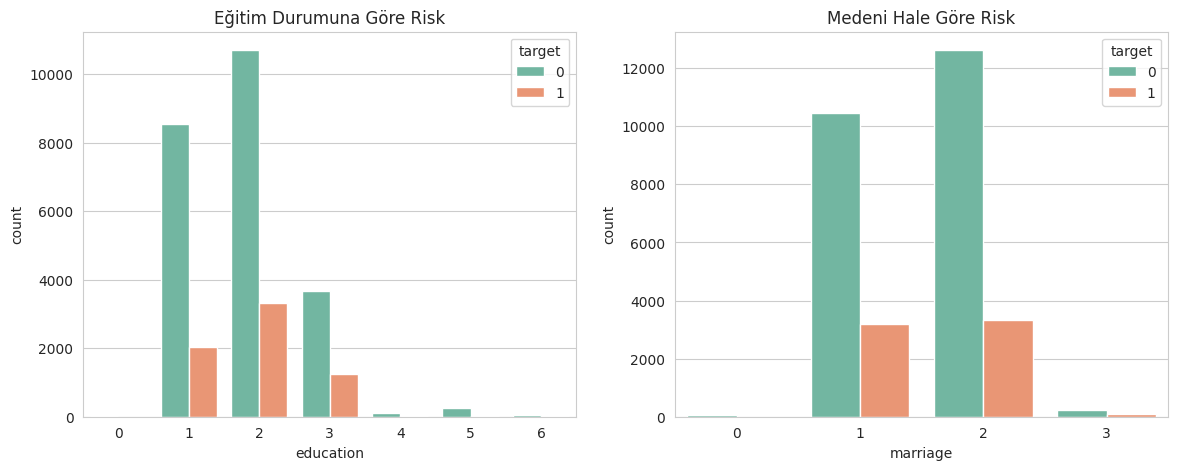

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='education', hue='target', data=df, ax=axes[0], palette='Set2')
axes[0].set_title('Eğitim Durumuna Göre Risk')

sns.countplot(x='marriage', hue='target', data=df, ax=axes[1], palette='Set2')
axes[1].set_title('Medeni Hale Göre Risk')

plt.show()

# EDA Bulguları ve Analiz Sonuçları

Bu bölümde, **Credit Card Default Prediction** veri seti üzerinde yapılan keşifsel veri analizinin (EDA) temel bulguları özetlenmiştir.

### 1. Veri Kalitesi ve Yapısı
* **Veri Bütünlüğü:** Veri setinde eksik (Null/NaN) değer bulunmamaktadır. Toplam **30.000 satır** ve **24 öznitelik** mevcuttur.
* **Veri Tipleri:** Tüm değişkenler sayısal (int/float) formatta olup modellemeye hazırdır. Kategorik değişkenler (Cinsiyet, Eğitim, Medeni Hal) halihazırda sayısal olarak kodlanmıştır.

### 2. Hedef Değişken (Target) Analizi
* **Sınıf Dengesizliği (Class Imbalance):** Veri seti dengesiz bir yapıdadır.
    * **Ödemeyenler (Default - 1):** ~%22.1
    * **Ödeyenler (Non-Default - 0):** ~%77.9
* **Çıkarım:** Model eğitirken bu dengesizlik göz ardı edilmemelidir. `Accuracy` (Doğruluk) metriği tek başına yanıltıcı olabilir. Bu nedenle model başarısını ölçerken **F1-Score**, **Recall** ve **ROC-AUC** metriklerine öncelik verilecektir.

### 3. Değişken İlişkileri ve Korelasyonlar
* **Ödeme Geçmişi (En Kritik Faktör):** Hedef değişken ile en yüksek pozitif korelasyona sahip değişkenler `PAY_0`, `PAY_2`, `PAY_3`... grubudur.
    * *Analiz:* Bir müşterinin en son ay (Eylül - PAY_0) ödemesini geciktirmesi, temerrüde düşeceğinin en güçlü sinyalidir.
* **Kredi Limiti:** `LIMIT_BAL` ile hedef değişken arasında negatif bir ilişki vardır. Kredi limiti arttıkça, batma riski azalma eğilimi göstermektedir.
* **Demografik Özellikler:** Yaş, cinsiyet ve medeni hal değişkenlerinin, ödeme geçmişi kadar baskın bir etkisi görülmemiştir. Ancak modelin genelleme yeteneği için bu özellikler korunmalıdır.

### 4. Sonraki Adım İçin Strateji (Feature Engineering)
Ham verilerle yapılan analiz sonucunda, model performansını artırmak için şu yeni özelliklerin türetilmesine karar verilmiştir:
1.  **Limit Kullanım Oranı:** `(BILL_AMT / LIMIT_BAL)` -> Müşterinin limitinin ne kadarını doldurduğu riski etkileyebilir.
2.  **Ödeme Karşılama Oranı:** `(PAY_AMT / BILL_AMT)` -> Müşterinin gelen ekstre borcunun ne kadarını kapatabildiği ödeme gücünü gösterir.
3.  **Gecikme Trendi:** Son 6 aydaki ödeme davranışının kötüye gidip gitmediğini gösteren trend özellikleri.